# Heaps

min-heap and max-heap arrays represent the preorder traversal of the binary tree.

heapq library only supports min-heap. to build a max-heap we can just negate the values.

In [62]:
# Build Min Heap (Heapify)
# TC: O(n) SC: O(1) arranges in place

import heapq
arr=[-4,3,1,0,2,5,10,8,12,9]
heapq.heapify(arr)
arr

[-4, 0, 1, 3, 2, 5, 10, 8, 12, 9]

In [63]:
# Heap Push
# Insert an element. TC O(log n) SC: O(1)

heapq.heappush(arr, 7)
arr
print(arr[0]) # peek the min element

-4


In [64]:
# Extract Min
# Remove the smallest element. TC O(log n) SC: O(1)
mini=heapq.heappop(arr)
mini

-4

In [65]:
# Heap Sort
# Sort the array in ascending order. TC O(n log n) SC: O(n)
ans=[0]*len(arr)
for i in range(len(arr)):
    ans[i]=heapq.heappop(arr)
ans

[0, 1, 2, 3, 5, 7, 8, 9, 10, 12]

In [66]:
# Max Heap
# Invert the sign of the elements in the array
arr=[-4,3,1,0,2,5,10,8,12,9]
for i in range(len(arr)):
    arr[i]=-arr[i]
max_heap=heapq.heapify(arr)
largest=-heapq.heappop(arr)
largest

12

In [67]:
# Build heap from scratch. When we have to add elements one by one
# TC: O(nlog n) SC: O(n)
arr=[-4,3,1,0,2,5,10,8,12,9]
heap = []
for i in arr:
    heapq.heappush(heap, i)
heap

[-4, 0, 1, 3, 2, 5, 10, 8, 12, 9]

## Implementation

- In an array representation of Heap for any i^th index in array, the 2*i+1^th and 2*i+2^th indices are the children.
- Similarly for any j^th node (j-1)//2^th element is the parent node. 

- 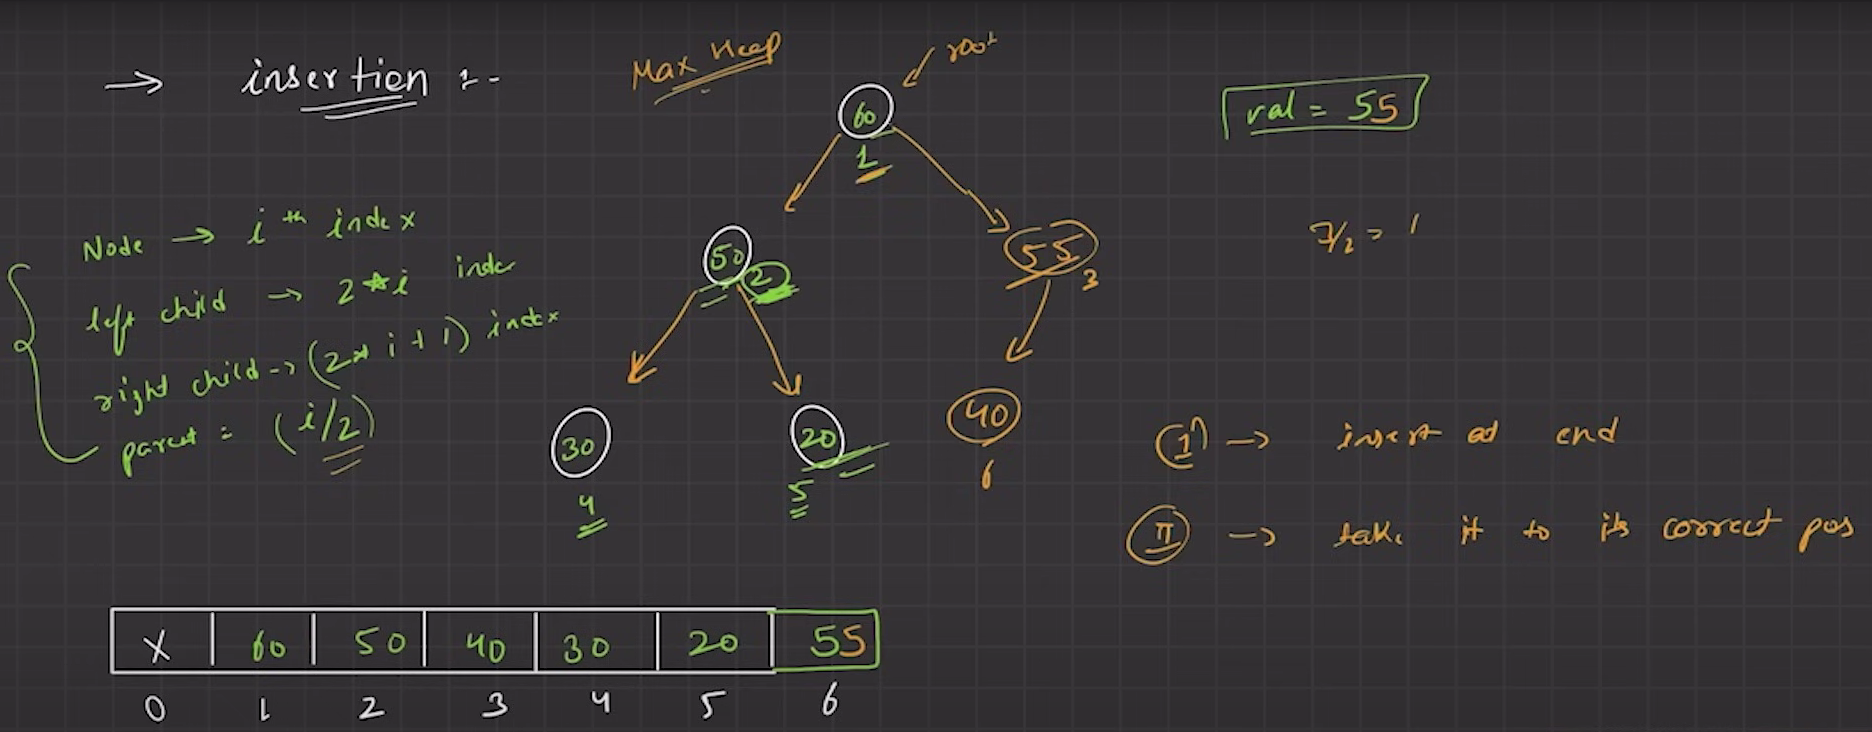
- 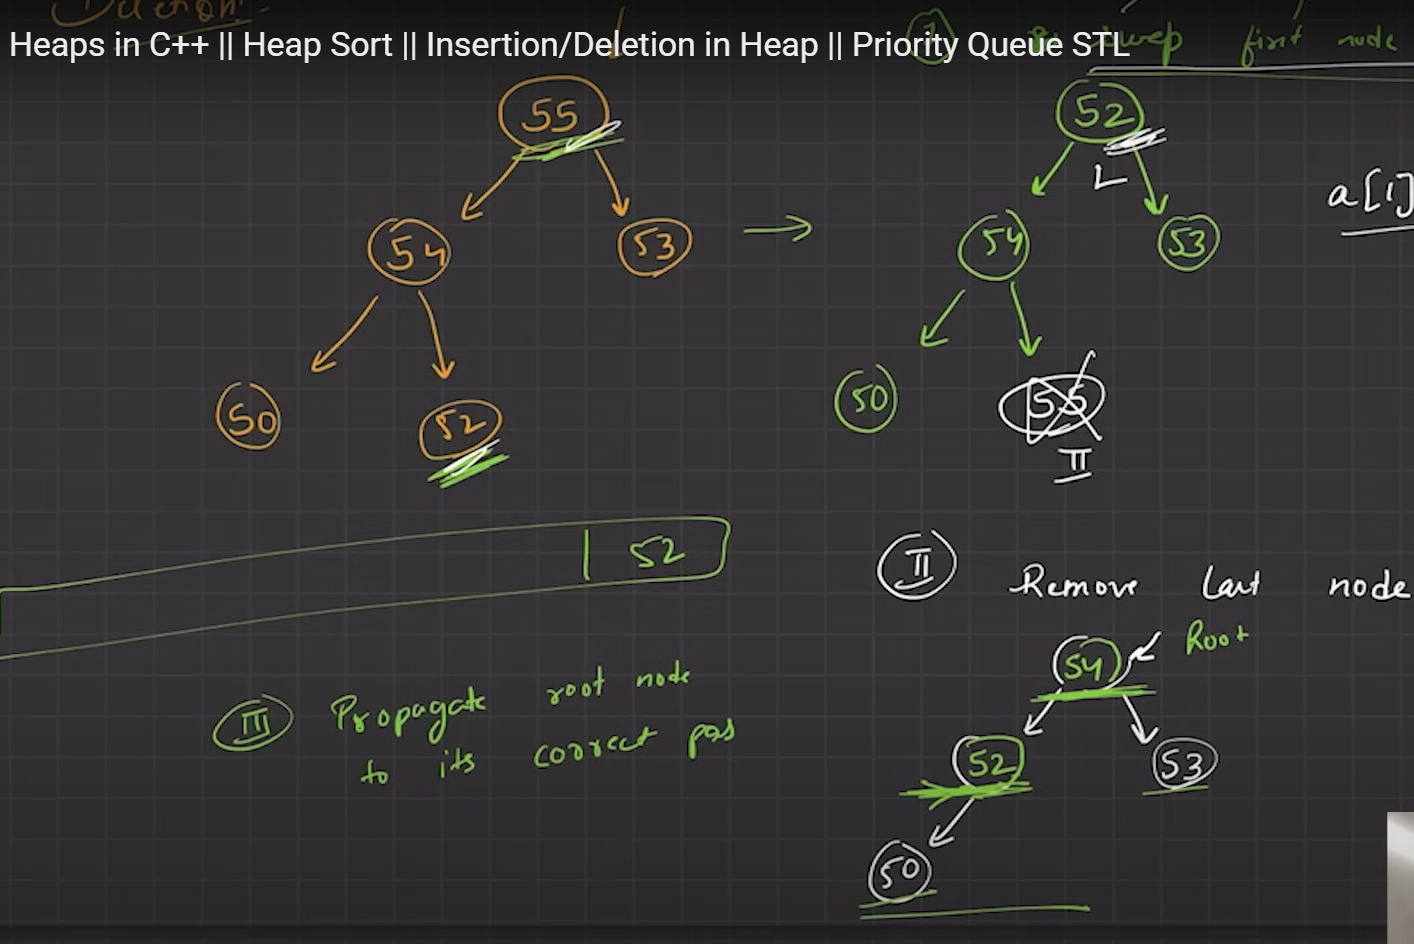

In [91]:
# Implementing a Min Heap from scratch
class Heap:
    
    def __init__(self):
        # here self.arr is the min heap 
        self.arr=[]
        self.size=0

    def insert(self,val):  # TC: O(log n) SC: O(1)
        self.arr.append(val)
        self.size+=1
        index=self.size-1
        while index>0:
            parent=(index-1)//2
            if self.arr[parent]>self.arr[index]:  # in min heap parent should be smaller than child
                self.arr[parent],self.arr[index]=self.arr[index],self.arr[parent]
                index=parent
            else: # min heap condition satisfied
                return 
            
    def heapify(self,index): # build a heap from an array. TC: O(n) SC: O(1)
        while True:
            smallest=index
            left=2*index+1
            right=2*index+2
            if left<self.size and self.arr[left]<self.arr[smallest]:
                smallest=left
            if right<self.size and self.arr[right]<self.arr[smallest]:
                smallest=right
            if smallest!=index:
                self.arr[index],self.arr[smallest]=self.arr[smallest],self.arr[index]
                index=smallest
            else:
                break
        return
    
    def build_heap(self,arr): # TC: O(n) SC: O(1)
        self.arr=arr
        self.size=len(arr)
        for i in range((self.size-2)//2,-1,-1): # because from n//2 to n-1 are leaf nodes, so they are heaps in themselves
            self.heapify(i) # heapify the non-leaf nodes from bottom to top
        return
    
    def pop(self): # TC: O(log n) SC: O(1)
        if self.size==0:
            return None
        mini=self.arr[0]
        self.arr[0]=self.arr[-1] # replace root with last element
        self.arr.pop() # remove last element
        self.size-=1
        index=0
        self.heapify(index)
        return mini

    def display(self):
        print(self.arr)


In [97]:
arr=[-4,3,1,0,2,5,10,8,12,9]
h=Heap()
h.build_heap(arr) # build a min heap from the array
h.display() # display the heap
h.insert(7) # insert an element into the heap
h.display() # display the heap after insertion
print(h.pop())
h.display()

[-4, 0, 1, 3, 2, 5, 10, 8, 12, 9]
[-4, 0, 1, 3, 2, 5, 10, 8, 12, 9, 7]
-4
[0, 2, 1, 3, 7, 5, 10, 8, 12, 9]
